In [8]:
import json
import os
from os.path import join

import pickle
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tabulate
from tqdm import tqdm_notebook as tqdm

import numpy as np
from itertools import cycle, islice

In [9]:
fig_width = 8
fig_height = 5

params = {
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
    #'text.fontsize': 8, # was 10
    'legend.fontsize': 12, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif',
    'grid.linestyle': '--',
}

matplotlib.rcParams.update(params)

In [10]:
data_dir = join('..', 'data', 'stream_experiment-results')
datasets =  ['TimBL-11M','DyLDO-127M']
bisimDepths = [0,1,2]
suffix = ''

output_dir = join('..', 'plots', 'stream_exp')

In [11]:
model_dtype = pd.api.types.CategoricalDtype(categories=['Characteristic Sets', 'Weak Summary',
                                                     'SemSets', 'SchemEX', 'TermPicker', 'SchemEX+U+oI',
                                                     'SchemEX+U+pI'], ordered=True)

config_dtype = pd.api.types.CategoricalDtype(categories=['SQ - 1k', 'SQ - 100k', 'SQ - 200k', 'CQ - 1k', 'CQ - 100k', 'SchemEX+U+oI',
                                                     'CQ - 200k'], ordered=True)

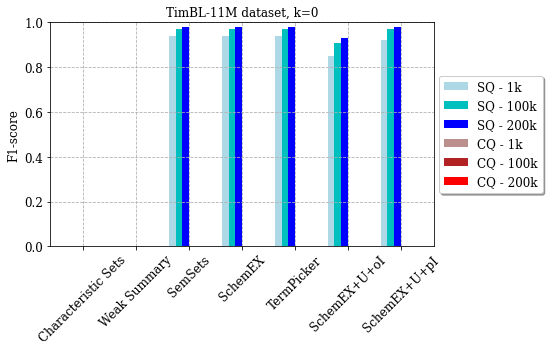

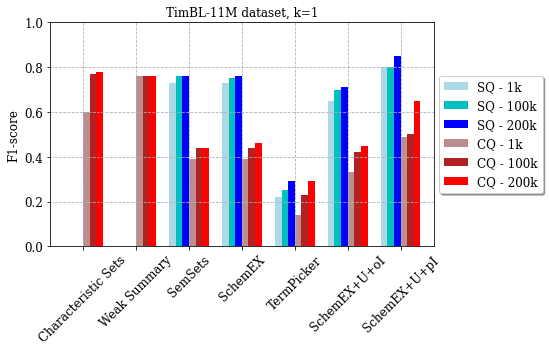

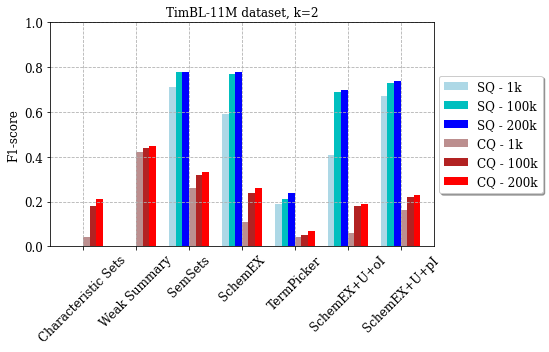

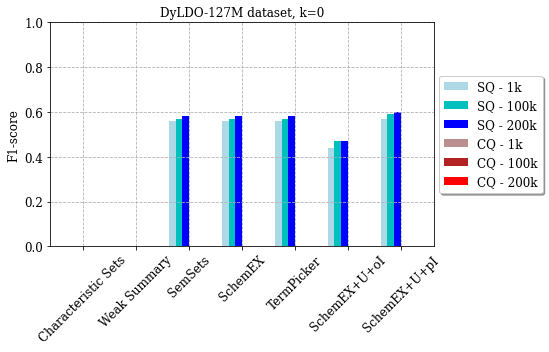

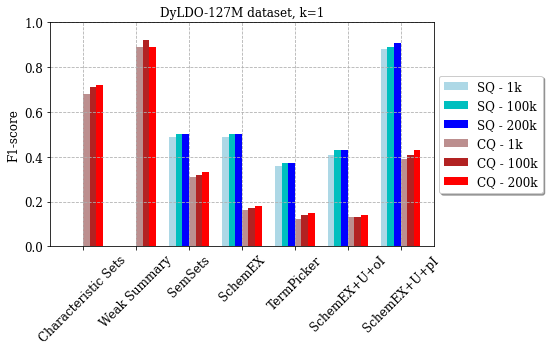

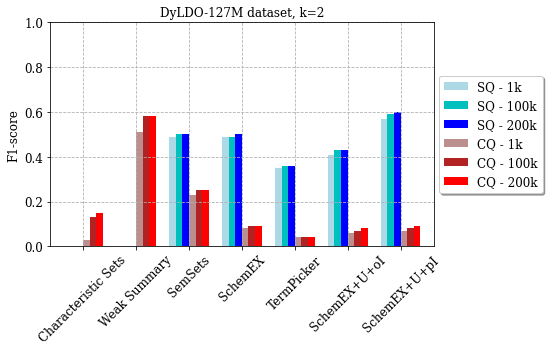

In [16]:
for dataset in datasets:
    for bisimK in bisimDepths:    
        # Load dataframe from CSV
        with open(join(data_dir, dataset +suffix + '.csv'), 'r') as f:
            df = pd.read_csv(f)
        df.head()
        # fig, ax = plt.subplots(figsize=(15,7))
        
        
        kf = df[df['k'] == bisimK].copy()
        kf.loc[(kf['model'] == 'W-Property Clique'), 'model'] = 'Weak Summary'
        kf['model'] = kf['model'].astype(model_dtype)
        kf['config'] = kf['config'].astype(config_dtype)
        ddf = kf.set_index(['model', 'config'])['f1']

        
        pdf = ddf.unstack()
        #print(pdf)
        pdf = pdf.sort_values(by=['model'], axis=0, ascending=True)
        
#        if bisimK != 0:
#            plt.rcParams['figure.figsize'] = [fig_width,4]
#        else:
#            plt.rcParams['figure.figsize'] = [fig_width,5.5]
            
        ax = pdf.plot(kind='bar', color=['lightblue', 'c', 'b', 'rosybrown', 'firebrick', 'red'], width=.75, rot=45)
        ax.set_ylim([0,1])
        # ax.legend(plot_methods.values())
        # ax.set_xticklabels([f'({int(i.left)}, {int(i.right)}]' for i in bins.cat.categories])
        ax.set_xlabel("")
        ax.set_ylabel("F1-score")
        #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), shadow=True, ncol=3)
        ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), shadow=True, ncol=1)
        plt.title(dataset + ' dataset, k=%s' % bisimK)

#        if bisimK != 0:
#            ax.get_legend().remove()
        
 
        plt.tight_layout()
        plt.grid()
        plt.savefig(output_dir + '/' + dataset + '_'+ str(bisimK) + '-approx.pdf', bbox_inches='tight', format='pdf')
        plt.savefig(output_dir + '/' + dataset + '_'+ str(bisimK) + '-approx.png', bbox_inches='tight', format='png', dpi=300)